In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

import mixture_of_poissons_class as poisson_M

## Generate the data

In [3]:
import tensorflow_probability as tfp
tfd = tfp.distributions

X = []
true_lambdas = [2, 5, 10, .5]
true_probs = [.1, .2,.3,.4]
true_probs = true_probs/np.sum(true_probs)
for _ in range(5000):
    rand = np.random.rand(1)
    if rand<true_probs[0]:
        X.append(tfd.Poisson(rate=true_lambdas[0]).sample(1)[0].numpy())
    elif rand<true_probs[1] + true_probs[0]:
        X.append(tfd.Poisson(rate=true_lambdas[1]).sample(1)[0].numpy())
    elif rand<true_probs[2] + true_probs[1] + true_probs[0]:
        X.append(tfd.Poisson(rate=true_lambdas[2]).sample(1)[0].numpy())
    else:
        X.append(tfd.Poisson(rate=true_lambdas[3]).sample(1)[0].numpy())
        
    

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

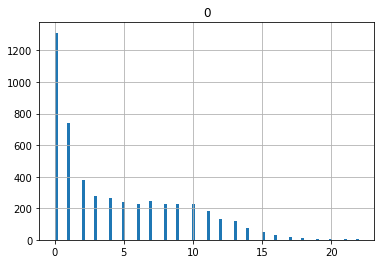

In [5]:
X = np.array(X)
pd.DataFrame(X).hist(bins=100)

## Fit poisson mixture and plot the results

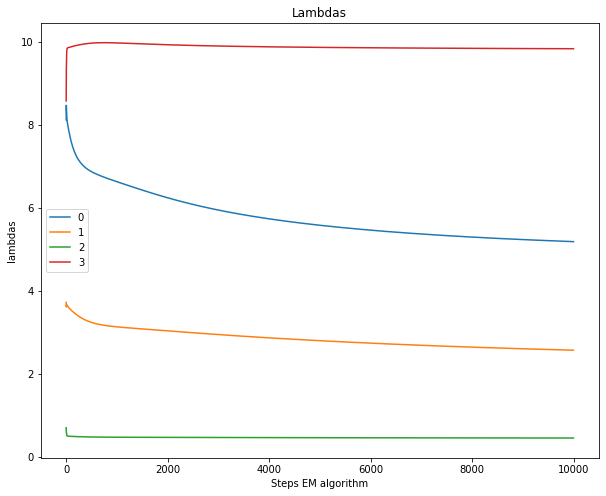

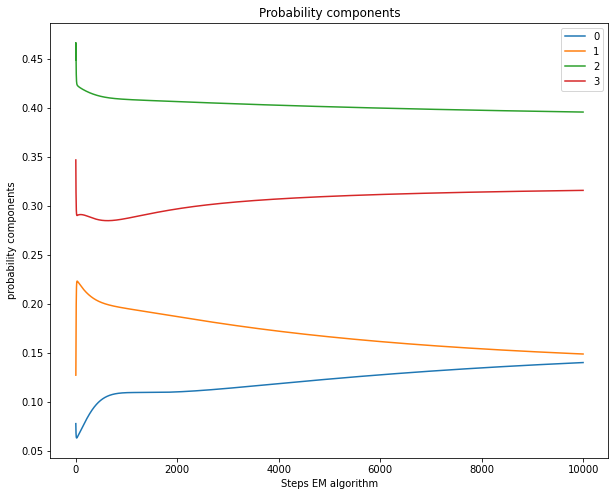

In [6]:
PM = poisson_M.PoissonMixture(4)
PM.fit(X, max_iterations=10000)
PM.plot_results(False, True, True)

In [7]:
p = PM.compute_Poisson(X, np.array(true_lambdas))
PM.expected_log_likelyhood(p, X, np.array(true_probs))
print('True log likelyhood: ', PM.expected_log_likelyhood(p, X, np.array(true_probs)))
print('Resulting log likelyhood after EM algorithm: ', PM.log_lik[-1])

True log likelyhood:  -2.4984880040028163
Resulting log likelyhood after EM algorithm:  -2.4979430702595384
